<a href="https://colab.research.google.com/github/ricardorocha86/Social-Net-data/blob/master/Analise_de_Classificadores_Social_Network_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Classificadores Social Network dataset**

Nesse notebook, faremos uma análise simples de diversos classificadores no conjunto de dados de compras direcionadas de um anúncio em redes sociais.

Trata-se de um exemplo ilustrativo, para mostrar o poder do python na análise de multiclassificadores 

## Fazendo as importações necessárias

In [0]:
import pandas as pd
from pandas import Series, DataFrame

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn.linear_model import LogisticRegression, Perceptron, PassiveAggressiveClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomTreesEmbedding, ExtraTreesClassifier, RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.neural_network import MLPClassifier
from sklearn.dummy import DummyClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score 

from time import time, sleep

## Importando os dados direto do Github

In [0]:
# Importing the dataset
url = 'https://raw.githubusercontent.com/ricardorocha86/Social-Net-data/master/Social_Network_Ads.csv'
dataset = pd.read_csv(url)

In [15]:
dataset.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19.0,19000.0,0
1,15810944,Male,35.0,20000.0,0
2,15668575,Female,26.0,43000.0,0
3,15603246,Female,27.0,57000.0,0
4,15804002,Male,19.0,76000.0,0


## Separando as variáveis explicativas de interesse e a variável resposta 

In [0]:
X = dataset.iloc[:, [2, 3]].values
Y = dataset.iloc[:, 4].values

## Pré-processamento básico: normalizando as variáveis contínuas

In [0]:
sc = StandardScaler()
X = sc.fit_transform(X)

## **Começo da Análise:** criando objetos para guardar os resultados e listando os classificadores que iremos utilizar

In [0]:
#Nomes dos classificadores considerados
nome = [
    '5-Vizinhos Mais Próximos',
    '15-Vizinhos Mais Próximos',
    '25-Vizinhos Mais Próximos',
    '35-Vizinhos Mais Próximos',
    'Árvore de Decisão',
    'Regressão Logística', 
    'Análise Discriminante Linear',
    'Análise Discriminante Quadrática',
    'Bagging de Árvores',
    'Bagging de Regressão Logística',
    'Floresta Aleatória',
    'AdaBoost',
    'Extra Árvores',
    'Classificador Passivo Agressivo',
    'Gradient Boosting',
    'Gaussian Naive Bayes', 
    'Support Vector Machine (Linear)',
    'Support Vector Machine (RBF)',
    'Support Vector Machine (Poli.G3)',
    'Support Vector Machine (Sigmoid)',
    'Rede Neural Perceptron',
    'Rede Neural MLP (10)',
    'Rede Neural MLP (10,10)',
    'Rede Neural MLP (100)']

#Classificadores considerados
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    KNeighborsClassifier(n_neighbors = 15),
    KNeighborsClassifier(n_neighbors = 25),
    KNeighborsClassifier(n_neighbors = 35),
    DecisionTreeClassifier(),
    LogisticRegression(), 
    LinearDiscriminantAnalysis(),
    QuadraticDiscriminantAnalysis(),
    BaggingClassifier(),
    BaggingClassifier(base_estimator = LogisticRegression()),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    ExtraTreesClassifier(),
    PassiveAggressiveClassifier(),
    GradientBoostingClassifier(),
    GaussianNB(), 
    SVC(kernel = 'linear'),
    SVC(kernel = 'rbf'),
    SVC(kernel = 'poly'),
    SVC(kernel = 'sigmoid'),
    Perceptron(),
    MLPClassifier(hidden_layer_sizes=(10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(10,10), max_iter = 1000),
    MLPClassifier(hidden_layer_sizes=(100), max_iter = 1000)]
  
#Dataframe com o nome e o respectivo classificador
classificadores = pd.DataFrame([nome,classifiers])


##Criando as funções para realizar a validação cruzada e uma auxiliadora para renomear adequadamente os resultados

In [0]:
#Avaliacao via validação cruzada
def vcruzada(classifier, X, Y, folds = 10):
    acc = cross_val_score(classifier, X, Y, cv=folds, scoring = 'accuracy')
    auc = cross_val_score(classifier, X, Y, cv=folds, scoring = 'roc_auc')
    f1 = cross_val_score(classifier, X, Y, cv=folds, scoring = 'f1')
    s = [np.mean(acc), np.std(acc), np.mean(auc), np.std(auc), np.mean(f1), np.std(f1)]
    return np.round(s,4)  
 
#Função Renomeadora
def renomear(results, nome):
    auxiliar = np.transpose(pd.DataFrame(np.round( results ,4)))
    auxiliar = auxiliar.rename(columns = {0: 'Acurácia', 1: 'Std. Dev.', 2: 'AreaROC', 3: 'Std. Dev.', 4: 'F1-Score', 5: 'Std. Dev.'})
    auxiliar = auxiliar.rename(index = {0: nome})
    return auxiliar

In [58]:
#Banco de dados contendo todos os resultados 
experimentos = pd.DataFrame()

#Loop para calcular as medidas via Validacao Cruzada da lista de classificadores
t0 = time()
for i in range(len(classifiers)):
    print('\nCalculando o classificador ' + str(i+1) + '/' + str(len(classifiers)) + ': ' + classificadores.iloc[0,i])
    t = time()
    nome = classificadores.iloc[0,i]
    classifier = classificadores.iloc[1,i]
    results = vcruzada(classifier, X, Y)
    print('Tempo de execução:', round(time()-t, 2), 'segundos')
    experimentos = pd.concat([experimentos, renomear(results, nome)])
print('\nTempo total de execução:', round(time()-t0, 2), 'segundos\n' )


Calculando o classificador 1/24: 5-Vizinhos Mais Próximos
Tempo de execução: 0.09 segundos

Calculando o classificador 2/24: 15-Vizinhos Mais Próximos
Tempo de execução: 0.09 segundos

Calculando o classificador 3/24: 25-Vizinhos Mais Próximos
Tempo de execução: 0.11 segundos

Calculando o classificador 4/24: 35-Vizinhos Mais Próximos
Tempo de execução: 0.1 segundos

Calculando o classificador 5/24: Árvore de Decisão
Tempo de execução: 0.06 segundos

Calculando o classificador 6/24: Regressão Logística
Tempo de execução: 0.11 segundos

Calculando o classificador 7/24: Análise Discriminante Linear
Tempo de execução: 0.06 segundos

Calculando o classificador 8/24: Análise Discriminante Quadrática
Tempo de execução: 0.05 segundos

Calculando o classificador 9/24: Bagging de Árvores
Tempo de execução: 0.53 segundos

Calculando o classificador 10/24: Bagging de Regressão Logística
Tempo de execução: 1.13 segundos

Calculando o classificador 11/24: Floresta Aleatória
Tempo de execução: 4.29

In [60]:
#metrica principal
metrica = 'Acurácia'

#Ordenando os resultados dos experimentos pela manor acurácia
experimentos = experimentos.sort_values(by = metrica, ascending = False)

#print(experimentos)
print(experimentos.iloc[:,[0,2,4]].sort_values(by = metrica, ascending = False))

                                  Acurácia  AreaROC  F1-Score
Support Vector Machine (RBF)        0.9050   0.9513    0.8746
5-Vizinhos Mais Próximos            0.9025   0.9297    0.8614
15-Vizinhos Mais Próximos           0.9025   0.9397    0.8680
25-Vizinhos Mais Próximos           0.9025   0.9466    0.8674
35-Vizinhos Mais Próximos           0.8975   0.9524    0.8558
Rede Neural MLP (10,10)             0.8950   0.9549    0.8565
Gradient Boosting                   0.8900   0.9475    0.8429
Rede Neural MLP (100)               0.8900   0.9549    0.8550
Análise Discriminante Quadrática    0.8875   0.9557    0.8351
Floresta Aleatória                  0.8825   0.9333    0.8236
Rede Neural MLP (10)                0.8800   0.9569    0.8535
Gaussian Naive Bayes                0.8775   0.9539    0.8124
Extra Árvores                       0.8750   0.9299    0.8160
AdaBoost                            0.8725   0.9427    0.7971
Bagging de Árvores                  0.8675   0.9211    0.8088
Árvore d

## Criando os gráficos pertinentes

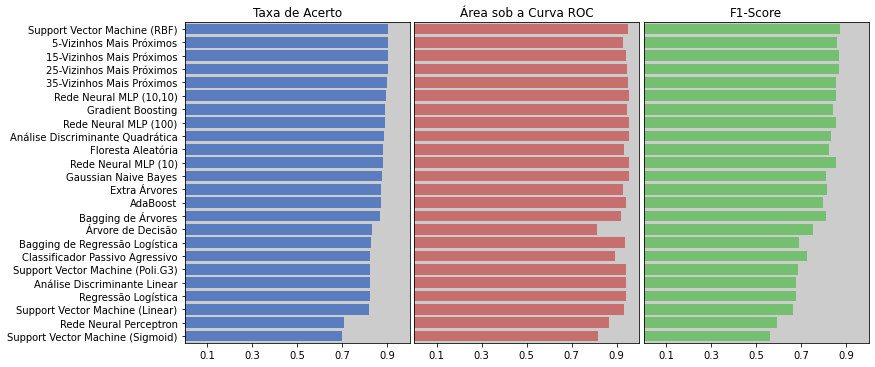

In [61]:
#Gráficos relevantes
sns.set_color_codes("muted")
bgcolor = '#cccccc'
figura = plt.figure(figsize=(20,5)) 
figura.subplots_adjust(left=0.425, bottom=0.01, right=0.9, top=0.9, wspace=0.02, hspace=1)
plt.subplot(1, 3, 1)
plt.title('Taxa de Acerto')
acc = sns.barplot(x = experimentos.iloc[:,0], y = experimentos.index.values, color='b')
acc.axes.set_xlim([0, 1])
acc.xaxis.set_ticks(np.arange(0.1, 1, 0.2))
acc.set_facecolor(bgcolor)
plt.xlabel('')
plt.subplot(1, 3, 2)
plt.title('Área sob a Curva ROC')
auc = sns.barplot(x = experimentos.iloc[:,2], y = experimentos.index.values, color='r')
auc.axes.get_yaxis().set_visible(False)
auc.axes.set_xlim([0, 1])
auc.xaxis.set_ticks(np.arange(0.1, 1, 0.2))
auc.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('')
plt.subplot(1, 3, 3)
plt.title('F1-Score')
f1 = sns.barplot(x = experimentos.iloc[:,4], y = experimentos.index.values, color='g')
f1.axes.set_xlim([0, 1])
f1.xaxis.set_ticks(np.arange(0.1, 1, 0.2))
f1.axes.get_yaxis().set_visible(False)
f1.set_facecolor(bgcolor)
plt.xlabel('')
plt.ylabel('') 
plt.show()
#figura.savefig('teste.pdf')

##Criando os gráficos de região de classificação

Plotando o gráfico 1/24: 5-Vizinhos Mais Próximos
Plotando o gráfico 2/24: 15-Vizinhos Mais Próximos
Plotando o gráfico 3/24: 25-Vizinhos Mais Próximos
Plotando o gráfico 4/24: 35-Vizinhos Mais Próximos
Plotando o gráfico 5/24: Árvore de Decisão
Plotando o gráfico 6/24: Regressão Logística
Plotando o gráfico 7/24: Análise Discriminante Linear
Plotando o gráfico 8/24: Análise Discriminante Quadrática
Plotando o gráfico 9/24: Bagging de Árvores
Plotando o gráfico 10/24: Bagging de Regressão Logística
Plotando o gráfico 11/24: Floresta Aleatória
Plotando o gráfico 12/24: AdaBoost
Plotando o gráfico 13/24: Extra Árvores
Plotando o gráfico 14/24: Classificador Passivo Agressivo
Plotando o gráfico 15/24: Gradient Boosting
Plotando o gráfico 16/24: Gaussian Naive Bayes
Plotando o gráfico 17/24: Support Vector Machine (Linear)
Plotando o gráfico 18/24: Support Vector Machine (RBF)
Plotando o gráfico 19/24: Support Vector Machine (Poli.G3)
Plotando o gráfico 20/24: Support Vector Machine (Sigmo

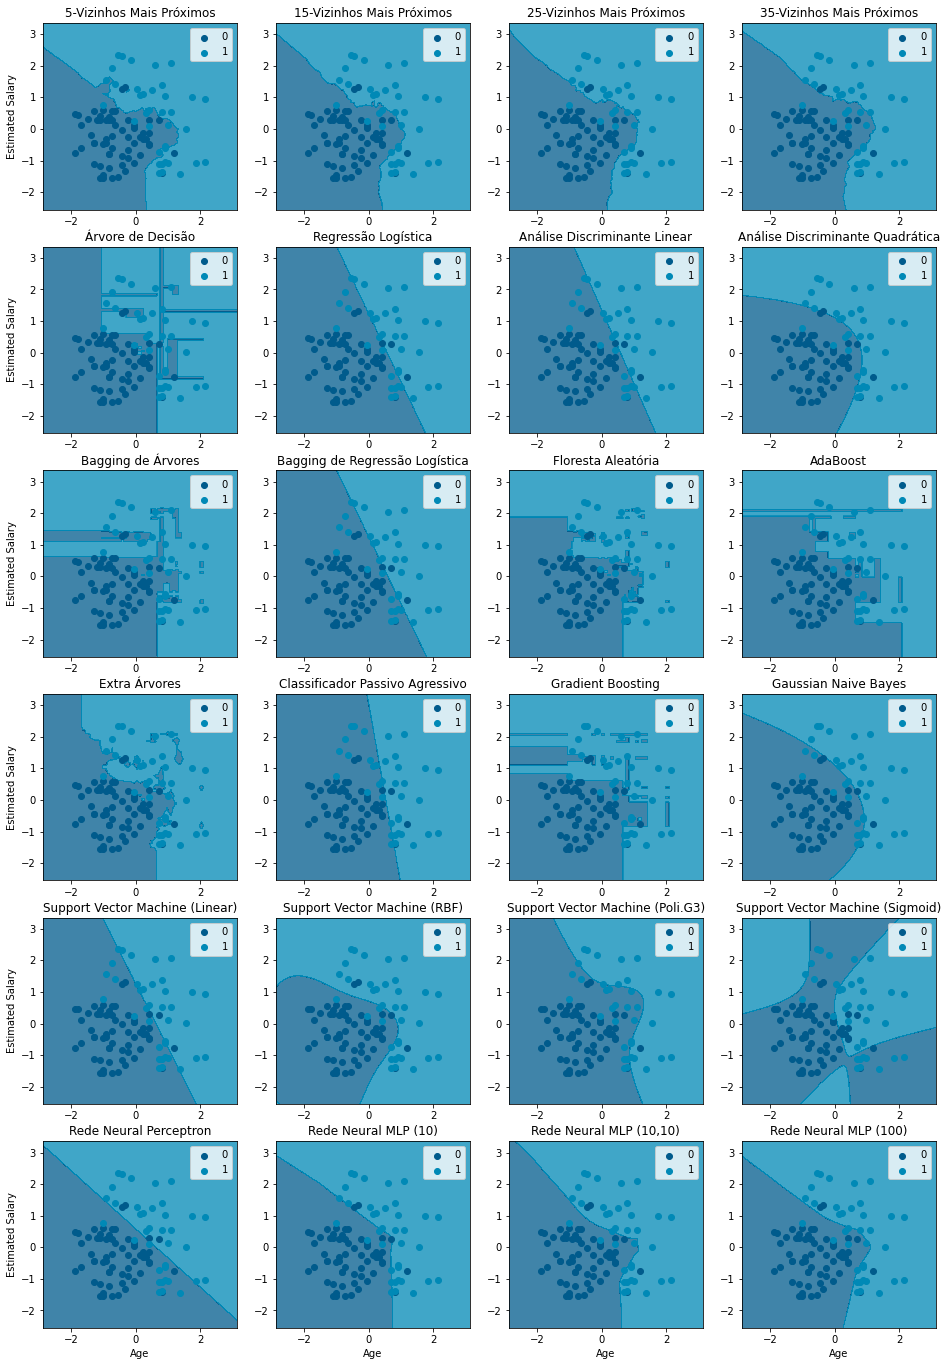

In [62]:
# Dividindo em Treino e Teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25 )       

# Plots das regioes de classificacao de cada método       
from matplotlib.colors import ListedColormap       
plt.figure(figsize=(16,24))

for k in range(len(classifiers)):
    print('Plotando o gráfico ' + str(k+1) + '/' + str(len(classifiers)) + ': ' + classificadores.iloc[0,k])
    plt.subplot(6, 4, k+1)
    X_set, y_set = X_test, y_test
    clf = classificadores.iloc[1,k]
    clf.fit(X_train, y_train)
    X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                         np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), X2.ravel()]).T).reshape(X1.shape),
                 alpha = 0.75, cmap = ListedColormap(('#005b8c', '#0089b6')))
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    # c = ListedColormap(('#005b8c', '#0089b6'))(i), label = j)
                    c = ['#005b8c', '#0089b6'][i], label = j)
    plt.title(classificadores.iloc[0,k])
    if k >= 20 :
        plt.xlabel('Age')
    if k in range(0,21,4):
        plt.ylabel('Estimated Salary')
    plt.legend()
#plt.savefig("foo.pdf", bbox_inches='tight')
plt.show() 

Veja que esse último gráfico permite visualizar em duas dimensões como cada classificador trabalha individualmente. 

Esse conjunto de dados é bom essencialmente para essa visualização, por conta de utilizar apenas duas variáveis contínuas como explicativas do modelo.

Veja quantos classificadores lineares apresentam praticamente o mesmo modelo.

Veja os modelos os melhores modelos tendem a ter fronteiras de decisão mais suaves, pois assim generalizam melhor para dados novos.